# Time Series Basics

## Correlated Stock Prices

You're interested in the performance of a particular stock. You use the [autocorrelation function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.autocorr.html) in Pandas to assess how autocorrelated your stock's values are.

Autocorrelation makes explicit the idea of temporal correlation we discussed previously. Suppose we wanted to see how correlated a stock's prices are with the immediately preceding day's stock prices. 

| Day | Price | Price with Lag = 1 | Price with Lag = 2 |
|-----|-------|--------------------|--------------------|
| 1   | 25    | NA                 | NA                 |
| 2   | 26    | 25                 | NA                 |
| 3   | 28    | 26                 | 25                 |
| 4   | 24    | 28                 | 26                 |
| 5   | 23    | 24                 | 28                 |

Autocorrelation with a lag of 1 will calculate the correlation between column "Price" and column "Price with Lag = 1." Autocorrelation with a lag of $k$ will calculate the correlation between stock price and the stock price of $k$ days before in a similar manner.

I build a loop that iterates through days (we'll assume our stock price is the closing price at every day) 1 to 365 to assess how correlated a stock price is with the stock price from $i$ days ago. (Sample code seen below.)

```
for i in range(1, 366):
    print(df[stock_prices].autocorr(lag=i))
```

#### 1. Suppose my highest values of autocorrelation are found when $i = 1, 7, 30, 365$. What do each of these suggest about the performance of this particular stock?

Answer: These suggest that our stock on day 𝑡 is very highly correlated with:

the immediately preceding day the stock one week before (day 𝑡−7)
the stock about one month before (day 𝑡−30), and
the stock one year before (day 𝑡−365).

Stock prices vary quite rapidly. Looking at almost any plot of stock price over time, we'll see a very "wiggly" function that moves around erratically. Building a model for this can be difficult.

One way to "de-noise" or "smooth" this is to create a [moving average](http://www.investopedia.com/terms/m/movingaverage.asp) of stock prices. Suppose I wanted to create a moving average of stock prices across $k$ days. In this case, I create a new column that takes the current day and $k-1$ previous days (for $k$ total days) and average the stock prices of these days.

For example, I have a column of stock prices and a column associated with a moving average for three days. Then, my row for Day 5 includes the Day 5 stock price and the average of Day 3, Day 4, and Day 5 stock prices. 

| Day | Price | Moving Average k = 3 |
|-----|-------|----------------------|
| 1   | 25    | NA                   |
| 2   | 26    | NA                   |
| 3   | 28    | 26.33                |
| 4   | 24    | 26                   |
| 5   | 23    | 25                   |

#### 2.  As the number of periods $k$ increases, how do I expect my plotted curve to change?

**Answer:** 
The number of moving average increased in a a given periods of $k$, the curve becomes more smoother. Averaging three days may gives little smoother moving average curve. Hoewever the number of the $k$ inceased from 10 days to 50 days to 100 days will push the curve to become smoother and smmoother and finally to become flat function.

#### 3. Suppose we use our moving average to predict values of the stock price. As $k$ increases, how is the bias of our predictions affected? 

**Answer:** As $k$ increases, the model flexiblity declined. This induced larger biase for the predictions.

#### 4. As $k$ increases, how is the variance of our predictions affected?

**Answer:** The increasing of $k$, it makes the model to become less flexible. This will cuase to reduce the  variance of the predictions.

## Stock price exploration 

#### Using the `yfinance` package, download stock data from the past three years for a company you are interested in. 

In [1]:
#!pip install yfinance
import yfinance as yf

#### Examine the data.

In [2]:
df_tesla = yf.download('TSLA', start="2017-01-01", end='2020-10-20')

[*********************100%***********************]  1 of 1 completed


In [3]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500


#### We'll be working with the 'Adj Close' column. Rename that column 'price' and make your DataFrame just that column and the datetime index. 

In [4]:
df_tesla = df_tesla[['Adj Close']]
df_tesla

,Adj Close
Date,
2017-01-03,43.397999
2017-01-04,45.397999
2017-01-05,45.349998
2017-01-06,45.801998
2017-01-09,46.256001
...,...
2020-10-13,446.649994
2020-10-14,461.299988
2020-10-15,448.880005


In [5]:
df_tesla.columns = ['price']
df_tesla.columns

Index(['price'], dtype='object')

#### Make a column that is the `price` of the previous day.

In [6]:
df_tesla['price'].shift(1)

Date
2017-01-03           NaN
2017-01-04     43.397999
2017-01-05     45.397999
2017-01-06     45.349998
2017-01-09     45.801998
                 ...    
2020-10-13    442.299988
2020-10-14    446.649994
2020-10-15    461.299988
2020-10-16    448.880005
2020-10-19    439.670013
Name: price, Length: 956, dtype: float64

In [7]:
df_tesla['prev_price'] = df_tesla['price'].shift(1)

<ipython-input-7-32a62fedcff1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tesla['prev_price'] = df_tesla['price'].shift(1)


In [8]:
train = df_tesla[:'2019'].dropna()
test = df_tesla['2020':]

#### Split the DataFrame into training and test sets so that the test set is the most recent year of data (you can use pandas slicing, scikit-learn, or sktime packages to do this).

In [9]:
import matplotlib.pyplot as plt

#### Plot the stock price with different colors for the training and test sets.

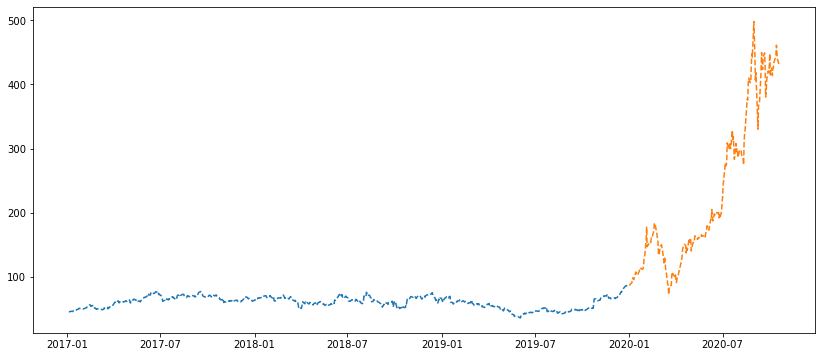

In [10]:
fig, ax = plt.subplots(figsize = (14, 6))
ax.plot_date(train.index, train.price, '--')
ax.plot_date(test.index, test.price, '--')

#### Find the autocorrelation of the training data.

In [11]:
train['price'].autocorr()

0.9806579319689023

#### Plot the autocorrelation using statsmodels `plot_acf`.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

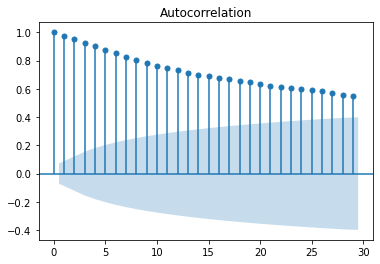

In [13]:
plot_acf(train['price']);

#### Plot the partial autocorrelation values using statsmodels `plot_pacf`.

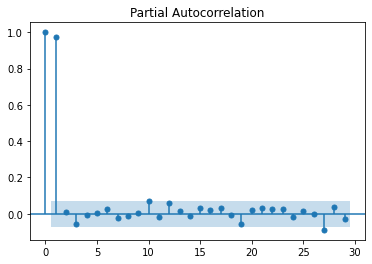

In [14]:
plot_pacf(train['price']);

#### Do any values show high autocorrelation?

**Answer:**
The plot has a lag at 0, and 1 are outside of the confidence band (blue region) and hence are statistically significant to affect the price. Those values laid under the blue region are insignificant to affect the price.

#### Make a baseline model that is just the last value from the training set.

In [15]:
baseline = train['price'][-1]

#### Score it on the test set using MAE

In [16]:
import numpy as np

In [17]:
preds = np.ones(len(test))*baseline
np.mean(abs(test['price'] - preds))

145.46762273807337

#### Using scikit-learn's LinearRegression class, make a model to predict the stock price based on the stock price from the day before. This is a very basic model that doesn't consider trend or seasonality.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(train[['prev_price']], train.price)

LinearRegression()

In [20]:
preds = lr.predict(test[['prev_price']])

#### Predict, plot, and score on MAE.

In [21]:
mae = np.mean(abs(test['price'] - preds))

#### How does the model do?

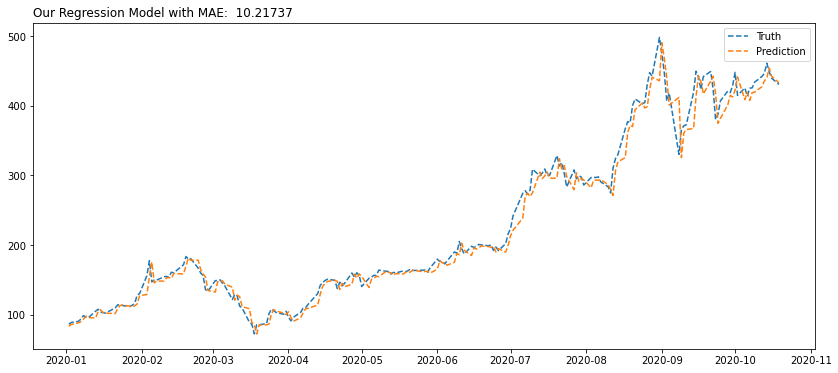

In [22]:
fig, ax = plt.subplots(figsize = (14, 6))
ax.plot_date(test.index, test.price, '--', label = 'Truth')
ax.plot_date(test.index, preds, '--', label = 'Prediction')
plt.legend()
plt.title(f'Our Regression Model with MAE: {mae: .5f}', loc = 'left');

#### Congratulations! You just made an autoregression model (AR)! 🎉